# Gastrointestinal Tract Classification (8 Classes)

## Download and extract the Dataset

In [1]:
!mkdir kvasir
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/ERzdk7nD_aBEgnA0NS-DlzwBjM2v0jo8iH-laBgi1YOkEg?e=JMgQXd&download=1' -O kvasir-dataset-v2.zip
!unzip /content/kvasir-dataset-v2.zip
!mv /content/content/kvasir/kvasir-dataset-v2 /content/kvasir
!rm -r /content/content

Streaming output truncated to the last 5000 lines.
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/3b77b2f5-5a77-47b9-9475-477c26ec78d7.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/195f99c7-bd05-4189-86f3-89480d1d3913.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/1b03c9ad-70b6-484f-b342-8614d5062e34.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/140670b4-221e-4149-b748-f29940067147.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/13a62adb-0941-4df7-b788-aa733e244f4f.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/760dfee6-3715-456b-ad6b-48b17db59fdd.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/4128a5ff-df5d-4b3a-9560-bd131a13526a.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/a1e1c7f8-a30f-4b4f-9d62-3d356a864229.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/b5e24486-2569-4192-9

## Verify data directories

In [2]:
!ls kvasir/kvasir-dataset-v2

dyed-lifted-polyps	esophagitis   normal-pylorus  polyps
dyed-resection-margins	normal-cecum  normal-z-line   ulcerative-colitis


In [3]:
#import libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D

In [4]:
#dataset path

dataset_directory = "/content/kvasir/kvasir-dataset-v2"

## Creating Random Train and Validation Splits

In [5]:
# train-test-splits
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                               labels="inferred",
                                                               image_size=(224, 224),
                                                               batch_size=16,
                                                               subset="training",
                                                               validation_split=0.222222222,
                                                               seed=123
                                                               )

validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                              labels="inferred",
                                                              image_size=(224, 224),
                                                              batch_size=16,
                                                              subset="validation",
                                                              validation_split=0.222222222,
                                                              seed=123
                                                              )

Found 7200 files belonging to 8 classes.
Using 5601 files for training.
Found 7200 files belonging to 8 classes.
Using 1599 files for validation.


In [6]:
#classes labels

print(len(training_data.class_names), "Classes are:", training_data.class_names)

8 Classes are: ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']


## Visualization

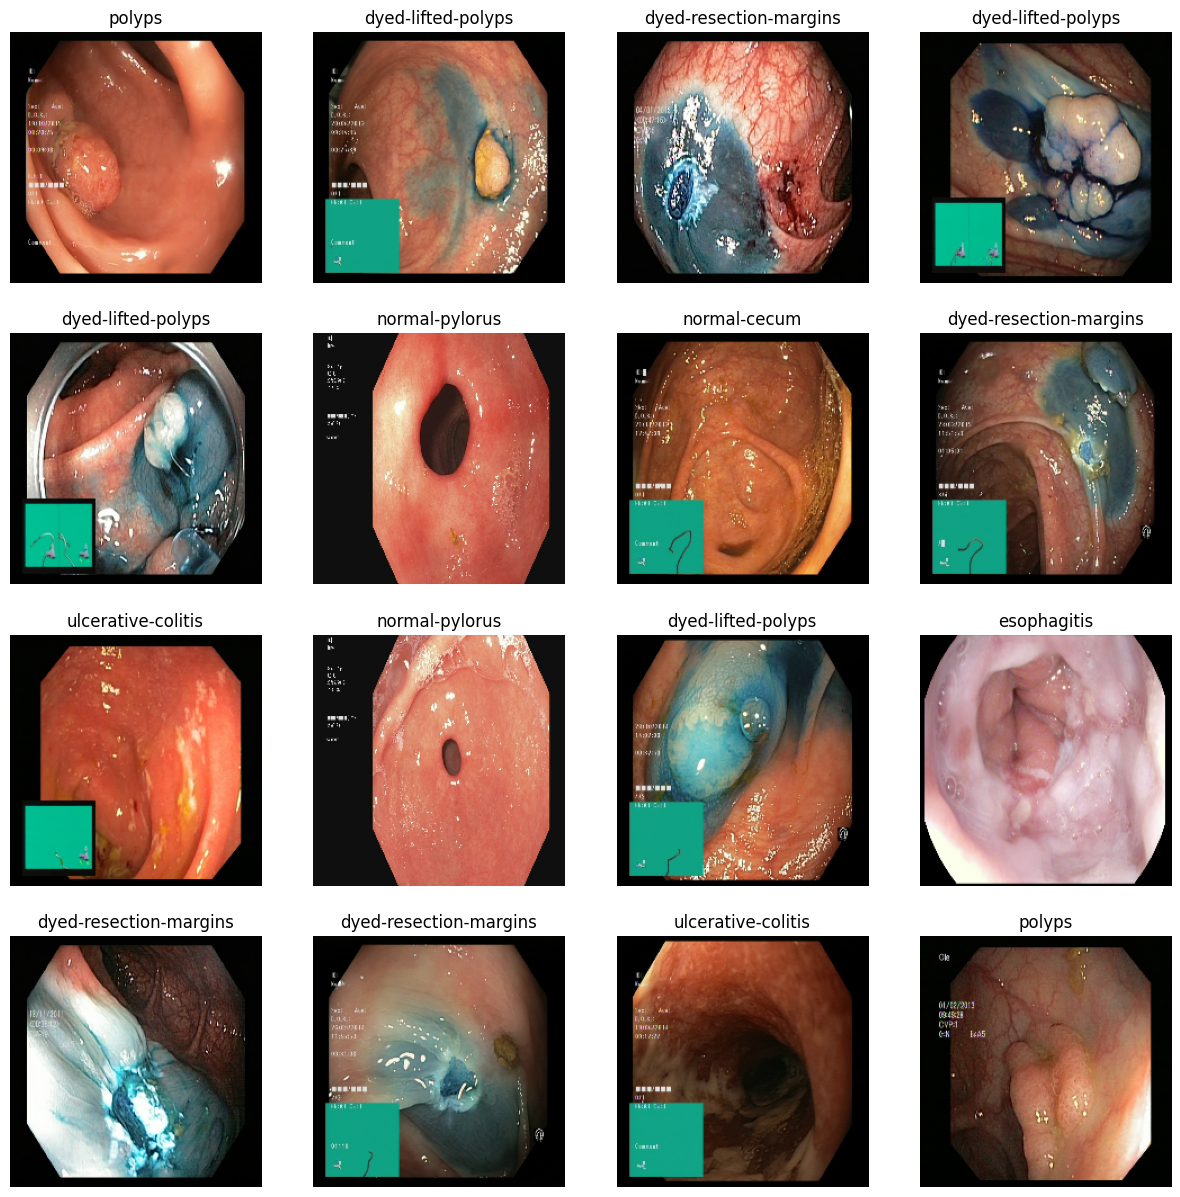

In [7]:
#image plot

plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(training_data.class_names[labels[i]])
    plt.axis('off')

In [8]:
training_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Architecture and Training

In [9]:
num_classes = len(training_data.class_names)

inputs = keras.Input(shape=(224, 224, 3))

x = keras.applications.vgg16.preprocess_input(inputs)

# Load pre-trained Xception model
base_model = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False

# Pass inputs through base model
x = base_model(x)

# Add pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dropout layer
x = keras.layers.Dropout(0.2)(x)

# Add dense output layer with softmax activation
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the model
model = keras.Model(inputs, outputs)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

epochs = 50

history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
351/351 [==============================] - 66s 163ms/step - loss: 1.8333 - accuracy: 0.5835 - val_loss: 0.5630 - val_accuracy: 0.8061
Epoch 2/50
351/351 [==============================] - 57s 161ms/step - loss: 0.7280 - accuracy: 0.7716 - val_loss: 0.4626 - val_accuracy: 0.8424
Epoch 3/50
351/351 [==============================] - 54s 151ms/step - loss: 0.5466 - accuracy: 0.8149 - val_loss: 0.4634 - val_accuracy: 0.8386
Epoch 4/50
351/351 [==============================] - 53s 148ms/step - loss: 0.4501 - accuracy: 0.8356 - val_loss: 0.3969 - val_accuracy: 0.8505
Epoch 5/50
351/351 [==============================] - 53s 148ms/step - loss: 0.4314 - accuracy: 0.8431 - val_loss: 0.3627 - val_accuracy: 0.8605
Epoch 6/50
351/351 [==============================] - 52s 146ms/step - loss: 0.4042 - accuracy: 0.8548 - val_loss: 0.4071 - val_accuracy: 0.8574
Epoch 7/50
351/351 [==============================] - 51s 142ms/s

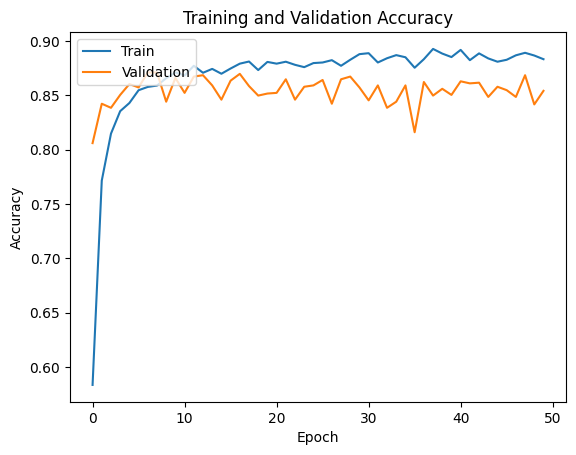

In [10]:
import matplotlib.pyplot as plt
# Plot training and validation metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
max_train_accuracy = max(history.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.8928762674331665
Maximum Validation Accuracy: 0.8711695075035095


## Model Finetuning

In [12]:
#Fine tuning the entire model

#unfreeze the top layers
base_model.tainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=.00001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

history_ft = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = 20,
                    callbacks=[checkpoint])

Epoch 1/20
351/351 [==============================] - 51s 141ms/step - loss: 0.2711 - accuracy: 0.8963 - val_loss: 0.4124 - val_accuracy: 0.8668
Epoch 2/20
351/351 [==============================] - 51s 144ms/step - loss: 0.2387 - accuracy: 0.9095 - val_loss: 0.4102 - val_accuracy: 0.8674
Epoch 3/20
351/351 [==============================] - 51s 144ms/step - loss: 0.2353 - accuracy: 0.9084 - val_loss: 0.4113 - val_accuracy: 0.8662
Epoch 4/20
351/351 [==============================] - 60s 167ms/step - loss: 0.2428 - accuracy: 0.9079 - val_loss: 0.4103 - val_accuracy: 0.8649
Epoch 5/20
351/351 [==============================] - 50s 140ms/step - loss: 0.2495 - accuracy: 0.9063 - val_loss: 0.4096 - val_accuracy: 0.8693
Epoch 6/20
351/351 [==============================] - 50s 139ms/step - loss: 0.2355 - accuracy: 0.9077 - val_loss: 0.4073 - val_accuracy: 0.8687
Epoch 7/20
351/351 [==============================] - 51s 143ms/step - loss: 0.2431 - accuracy: 0.9081 - val_loss: 0.4068 - val_ac

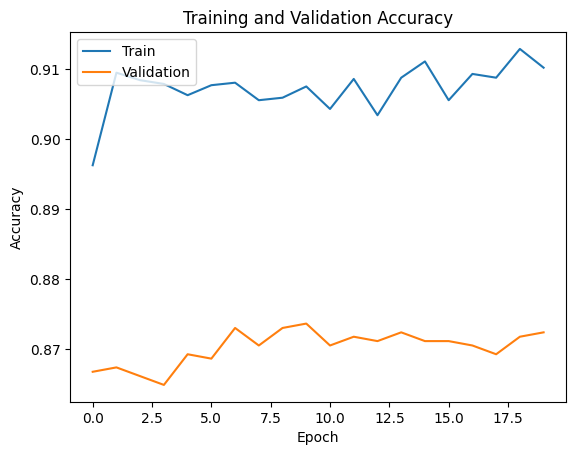

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing for Unseen Data.

In [14]:
# Load the model with the highest validation accuracy
best_model = model.load_weights('best_model.keras')

In [15]:
!mkdir kvasir-valid
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1' -O kvasir-validation-dataset.zip
!unzip /content/kvasir-validation-dataset.zip
!mv /content/content/kvasir-validation /content/kvasir-valid
!rm -r /content/content

--2024-01-05 18:04:19--  https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1
Resolving pern-my.sharepoint.com (pern-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to pern-my.sharepoint.com (pern-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1 [following]
--2024-01-05 18:04:20--  https://pern-my.sharepoint.com/personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1
Reusing existing connection to pern-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 245504250 (234M) [application/x-zip-compressed]
Saving to: ‘kvasir-validation-dataset.zip’

kvasir-validation-d 100%[===================>

In [17]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/kvasir-valid/kvasir-validation',
    image_size=(224, 224),
    batch_size=16,
    shuffle=False,
)

Found 800 files belonging to 8 classes.


In [18]:
# Extract true labels from the directory structure
true_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())

# Convert to numpy array
true_labels = np.array(true_labels)

# Make predictions using the model on the validation dataset
predictions = model.predict(validation_dataset)

# Ensure the number of samples matches
num_samples_predictions = len(predictions)
num_samples_true_labels = len(true_labels)

if num_samples_predictions != num_samples_true_labels:
    print(f"Error: Mismatch in the number of samples - Predictions: {num_samples_predictions}, True Labels: {num_samples_true_labels}")
else:
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score, classification_report

    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"\nAccuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

50/50 [==============================] - 7s 145ms/step

Accuracy: 0.87625

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       100
           1       0.92      0.80      0.86       100
           2       0.79      0.74      0.76       100
           3       0.91      0.95      0.93       100
           4       1.00      0.98      0.99       100
           5       0.75      0.81      0.78       100
           6       0.92      0.88      0.90       100
           7       0.94      0.94      0.94       100

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



In [19]:
max_train_accuracy = max(history_ft.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history_ft.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9128726720809937
Maximum Validation Accuracy: 0.8736710548400879


In [20]:
print("Training accuracy list:", history.history['accuracy'])
print("Validation accuracy list:", history.history['val_accuracy'])

print("Training accuracy list (finetuned):", history_ft.history['accuracy'])
print("Validation accuracy list (finetuned):", history_ft.history['val_accuracy'])

Training accuracy list: [0.5834672451019287, 0.7716479301452637, 0.8148545026779175, 0.8355650901794434, 0.8430637121200562, 0.8548473715782166, 0.8578824996948242, 0.8591322898864746, 0.8659167885780334, 0.8712729811668396, 0.8684163689613342, 0.8773433566093445, 0.8709158897399902, 0.8744866847991943, 0.8700231909751892, 0.8748437762260437, 0.8793072700500488, 0.8812711834907532, 0.873415470123291, 0.8809141516685486, 0.8793072700500488, 0.8810926675796509, 0.8782360553741455, 0.8760935664176941, 0.8798428773880005, 0.8803784847259521, 0.8825209736824036, 0.8773433566093445, 0.8828780651092529, 0.888055682182312, 0.888948380947113, 0.8803784847259521, 0.8843063712120056, 0.887162983417511, 0.8851990699768066, 0.8755579590797424, 0.8834136724472046, 0.8928762674331665, 0.8885913491249084, 0.8853775858879089, 0.8919835686683655, 0.8825209736824036, 0.8887698650360107, 0.8841278553009033, 0.8810926675796509, 0.8828780651092529, 0.8869844675064087, 0.8893054723739624, 0.8868059515953064,